In [116]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn import set_config
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

set_config(display='diagram')

# Diccionario 

pitch_type
The type of pitch derived from Statcast.

game_date
Date of the Game.

release_speed
Pitch velocities from 2008-16 are via Pitch F/X, and adjusted to roughly out-of-hand release point. All velocities from 2017 and beyond are Statcast, which are reported out-of-hand.

release_pos_x
Horizontal Release Position of the ball measured in feet from the catcher's perspective.

release_pos_z
Vertical Release Position of the ball measured in feet from the catcher's perspective.

player_name
Player's name tied to the event of the search.

batter
MLB Player Id tied to the play event.

pitcher
MLB Player Id tied to the play event.

events
Event of the resulting Plate Appearance.

description
Description of the resulting pitch.

spin_dir
* Deprecated field from the old tracking system.

spin_rate_deprecated
* Deprecated field from the old tracking system. Replaced by release_spin

break_angle_deprecated
* Deprecated field from the old tracking system.

break_length_deprecated
* Deprecated field from the old tracking system.

zone
Zone location of the ball when it crosses the plate from the catcher's perspective.


des
Plate appearance description from game day.

game_type
Type of Game. E = Exhibition, S = Spring Training, R = Regular Season, F = Wild Card, D = Divisional Series, L = League Championship Series, W = World Series

stand
Side of the plate batter is standing.

p_throws
Hand pitcher throws with.

home_team
Abbreviation of home team.

away_team
Abbreviation of away team.

type
Short hand of pitch result. B = ball, S = strike, X = in play.

hit_location
Position of first fielder to touch the ball.

bb_type
Batted ball type, ground_ball, line_drive, fly_ball, popup.

balls
Pre-pitch number of balls in count.

strikes
Pre-pitch number of strikes in count.

game_year
Year game took place.

pfx_x
Horizontal movement in feet from the catcher's perspective.

pfx_z
Vertical movement in feet from the catcher's perpsective.

plate_x
Horizontal position of the ball when it crosses home plate from the catcher's perspective.

plate_z
Vertical position of the ball when it crosses home plate from the catcher's perspective.

on_3b
Pre-pitch MLB Player Id of Runner on 3B.

on_2b
Pre-pitch MLB Player Id of Runner on 2B.

on_1b
Pre-pitch MLB Player Id of Runner on 1B.

outs_when_up
Pre-pitch number of outs.

inning
Pre-pitch inning number.

inning_topbot
Pre-pitch top or bottom of inning.

hc_x
Hit coordinate X of batted ball.

hc_y
Hit coordinate Y of batted ball.

tfs_deprecated
* Deprecated field from old tracking system.

tfs_zulu_deprecated
* Deprecated field from old tracking system.

fielder_2
Pre-pitch MLB Player Id of Catcher.

umpire
* Deprecated field from old tracking system.

sv_id
Non-unique Id of play event per game.

vx0
The velocity of the pitch, in feet per second, in x-dimension, determined at y=50 feet.

vy0
The velocity of the pitch, in feet per second, in y-dimension, determined at y=50 feet.

vy0
The velocity of the pitch, in feet per second, in z-dimension, determined at y=50 feet.

ax
The acceleration of the pitch, in feet per second per second, in x-dimension, determined at y=50 feet.

ay
The acceleration of the pitch, in feet per second per second, in y-dimension, determined at y=50 feet.

az
The acceleration of the pitch, in feet per second per second, in z-dimension, determined at y=50 feet.

sz_top
Top of the batter's strike zone set by the operator when the ball is halfway to the plate.

sz_bot
Bottom of the batter's strike zone set by the operator when the ball is halfway to the plate.

hit_distance
Projected hit distance of the batted ball.

launch_speed
Exit velocity of the batted ball as tracked by Statcast. For the limited subset of batted balls not tracked directly, estimates are included based on the process described here.

launch_angle
Launch angle of the batted ball as tracked by Statcast. For the limited subset of batted balls not tracked directly, estimates are included based on the process described here.

effective_speed
Derived speed based on the the extension of the pitcher's release.

release_spin
Spin rate of pitch tracked by Statcast.

release_extension
Release extension of pitch in feet as tracked by Statcast.

game_pk
Unique Id for Game.

pitcher
MLB Player Id tied to the play event.

fielder_2
MLB Player Id for catcher.

fielder_3
MLB Player Id for 1B.

fielder_4
MLB Player Id for 2B.

fielder_5
MLB Player Id for 3B.

fielder_6
MLB Player Id for SS.

fielder_7
MLB Player Id for LF.

fielder_8
MLB Player Id for CF.

fielder_9
MLB Player Id for RF.

release_pos_y
Release position of pitch measured in feet from the catcher's perspective.

estimated_ba_using_speedangle
Estimated Batting Avg based on launch angle and exit velocity.

estimated_woba_using_speedangle
Estimated wOBA based on launch angle and exit velocity.

woba_value
wOBA value based on result of play.

woba_denom
wOBA denominator based on result of play.

babip_value
BABIP value based on result of play.

iso_value
ISO value based on result of play.

launch_speed_angle
Launch speed/angle zone based on launch angle and exit velocity.
1: Weak
2: Topped
3: Under
4: Flare/Burner
5: Solid Contact
6: Barrel


at_bat_number
Plate appearance number of the game.

pitch_number
Total pitch number of the plate appearance.

pitch_name
The name of the pitch derived from the Statcast Data.

home_score
Pre-pitch home score

away_score
Pre-pitch away score

bat_score
Pre-pitch bat team score

fld_score
Pre-pitch field team score

post_home_score
Post-pitch home score

post_away_score
Post-pitch away score

post_bat_score
Post-pitch bat team score

if_fielding_alignment
Infield fielding alignment at the time of the pitch.

of_fielding_alignment
Outfield fielding alignment at the time of the pitch.

spin_axis
The Spin Axis in the 2D X-Z plane in degrees from 0 to 360, such that 180 represents a pure backspin fastball and 0 degrees represents a pure topspin (12-6) curveball

delta_home_win_exp
The change in Win Expectancy before the Plate Appearance and after the Plate Appearance

delta_run_exp
The change in Run Expectancy before the Pitch and after the Pitch

In [117]:
df = pd.read_csv('train.csv')

In [118]:
df.head()

,uid,sz_top,sz_bot,pitch_type,release_pos_x,release_pos_y,release_pos_z,stand,p_throws,inning,...,on_2b,on_1b,release_speed,spin_axis,release_spin_rate,pfx_x,pfx_z,plate_x,plate_z,is_strike
0,0,3.35,1.59,FF,-1.94,53.66,6.53,R,R,1,...,False,False,90.6,192,2192,-0.18,1.68,-0.01,1.97,1
1,1,3.53,1.70,FF,-1.90,53.57,6.39,R,R,1,...,False,False,92.6,196,2209,-0.20,1.67,0.66,2.62,1
2,2,3.67,1.73,FF,-1.87,53.51,6.40,R,R,1,...,False,False,91.6,187,2314,-0.16,1.61,0.55,2.28,1
3,3,3.65,1.72,FF,-1.97,53.65,6.36,R,R,1,...,False,False,93.5,194,2235,-0.36,1.79,-0.83,2.57,1
4,4,3.56,1.72,SL,-1.96,53.74,6.40,R,R,1,...,False,False,89.3,184,2314,0.32,1.25,1.18,1.41,0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291271 entries, 0 to 291270
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   uid                    291271 non-null  int64  
 1   sz_top                 291271 non-null  float64
 2   sz_bot                 291271 non-null  float64
 3   pitch_type             291271 non-null  object 
 4   release_pos_x          291271 non-null  float64
 5   release_pos_y          291271 non-null  float64
 6   release_pos_z          291271 non-null  float64
 7   stand                  291271 non-null  object 
 8   p_throws               291271 non-null  object 
 9   inning                 291271 non-null  int64  
 10  inning_topbot          291271 non-null  object 
 11  outs_when_up           291271 non-null  int64  
 12  balls                  291271 non-null  int64  
 13  strikes                291271 non-null  int64  
 14  if_fielding_alignment  291271 non-nu

In [120]:
df.describe()

,uid,sz_top,sz_bot,release_pos_x,release_pos_y,release_pos_z,inning,outs_when_up,balls,strikes,release_speed,spin_axis,release_spin_rate,pfx_x,pfx_z,plate_x,plate_z,is_strike
count,291271.000000,291271.000000,291271.000000,291271.000000,291271.000000,291271.000000,291271.000000,291271.000000,291271.000000,291271.000000,291271.000000,291271.000000,291271.000000,291271.000000,291271.000000,291271.000000,291271.000000,291271.000000
mean,155639.324680,3.379379,1.598739,-0.813205,54.184560,5.800482,4.928568,0.969530,0.777338,0.761542,88.902657,174.987726,2248.413931,-0.109728,0.630969,0.059891,2.313389,0.332251
std,89840.848356,0.200857,0.119384,1.839077,0.446865,0.570652,2.595987,0.819591,0.933862,0.808403,6.192586,72.426845,322.155628,0.891675,0.752684,0.995193,1.099265,0.471021
min,0.000000,2.520000,0.770000,-4.820000,48.370000,0.860000,1.000000,0.000000,0.000000,0.000000,32.300000,0.000000,89.000000,-2.380000,-2.000000,-8.660000,-3.830000,0.000000
25%,77842.500000,3.250000,1.520000,-2.090000,53.890000,5.530000,3.000000,0.000000,0.000000,0.000000,84.600000,131.000000,2099.000000,-0.870000,0.170000,-0.700000,1.530000,0.000000
50%,155691.000000,3.380000,1.600000,-1.510000,54.170000,5.850000,5.000000,1.000000,0.000000,1.000000,90.100000,199.000000,2272.000000,-0.180000,0.720000,0.080000,2.250000,0.000000
75%,233418.500000,3.510000,1.680000,0.900000,54.480000,6.150000,7.000000,2.000000,1.000000,1.000000,93.800000,222.000000,2439.000000,0.610000,1.260000,0.820000,3.070000,1.000000
max,311270.000000,4.240000,2.200000,4.700000,57.530000,7.660000,15.000000,2.000000,4.000000,2.000000,104.000000,360.000000,3593.000000,2.570000,2.800000,4.610000,10.220000,1.000000


# Exploratorio

In [121]:
print(df['is_strike'].head())

0    1
1    1
2    1
3    1
4    0
Name: is_strike, dtype: int64


In [122]:
df['strikes'].head()

0    0
1    1
2    0
3    1
4    2
Name: strikes, dtype: int64

In [123]:
df['strikes'].value_counts()

0    138184
1     84359
2     68728
Name: strikes, dtype: int64

In [124]:
df['is_strike'].value_counts()

0    194496
1     96775
Name: is_strike, dtype: int64

In [125]:
df['is_strike'].value_counts()

0    194496
1     96775
Name: is_strike, dtype: int64

# Missing and Duplicated Values

In [126]:
# Check for duplicates
print('Total of duplicated values',df.duplicated().sum())

Total of duplicated values 0


In [127]:
print(df.isna().sum().sum(), 'missing values')

0 missing values


Text(0.5, 1.0, 'Tipo de Picheo')

<Figure size 720x720 with 0 Axes>

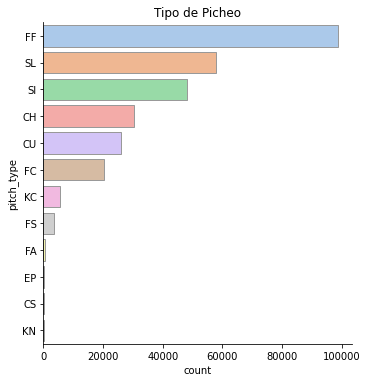

In [128]:
plt.figure(figsize=(10, 10))
sns.catplot(data= df, y ='pitch_type', kind = "count", palette = "pastel", edgecolor = ".6",order = df.pitch_type.value_counts().index)
plt.title('Tipo de Picheo')

Text(0.5, 1.0, 'Mano con la que lanza el pitcher con la relacion de strike')

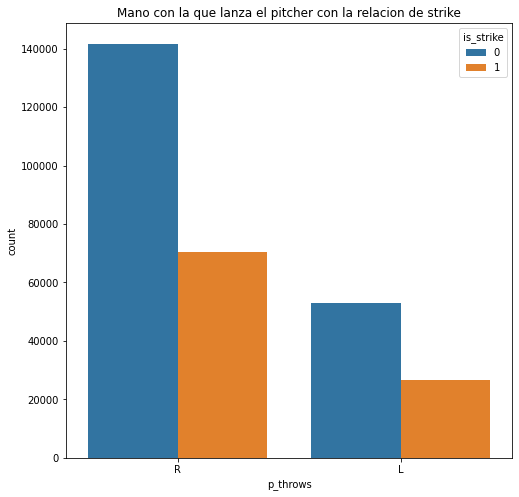

In [129]:
plt.figure(figsize=(8, 8))
sns.countplot(x= 'p_throws',hue='is_strike' ,data=df)
plt.title('Mano con la que lanza el pitcher con la relacion de strike')

# Correlacion 

<AxesSubplot:>

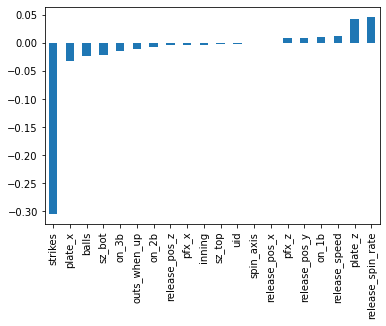

In [130]:
df.corr()['is_strike'].drop('is_strike').sort_values().plot(kind='bar')


<AxesSubplot:>

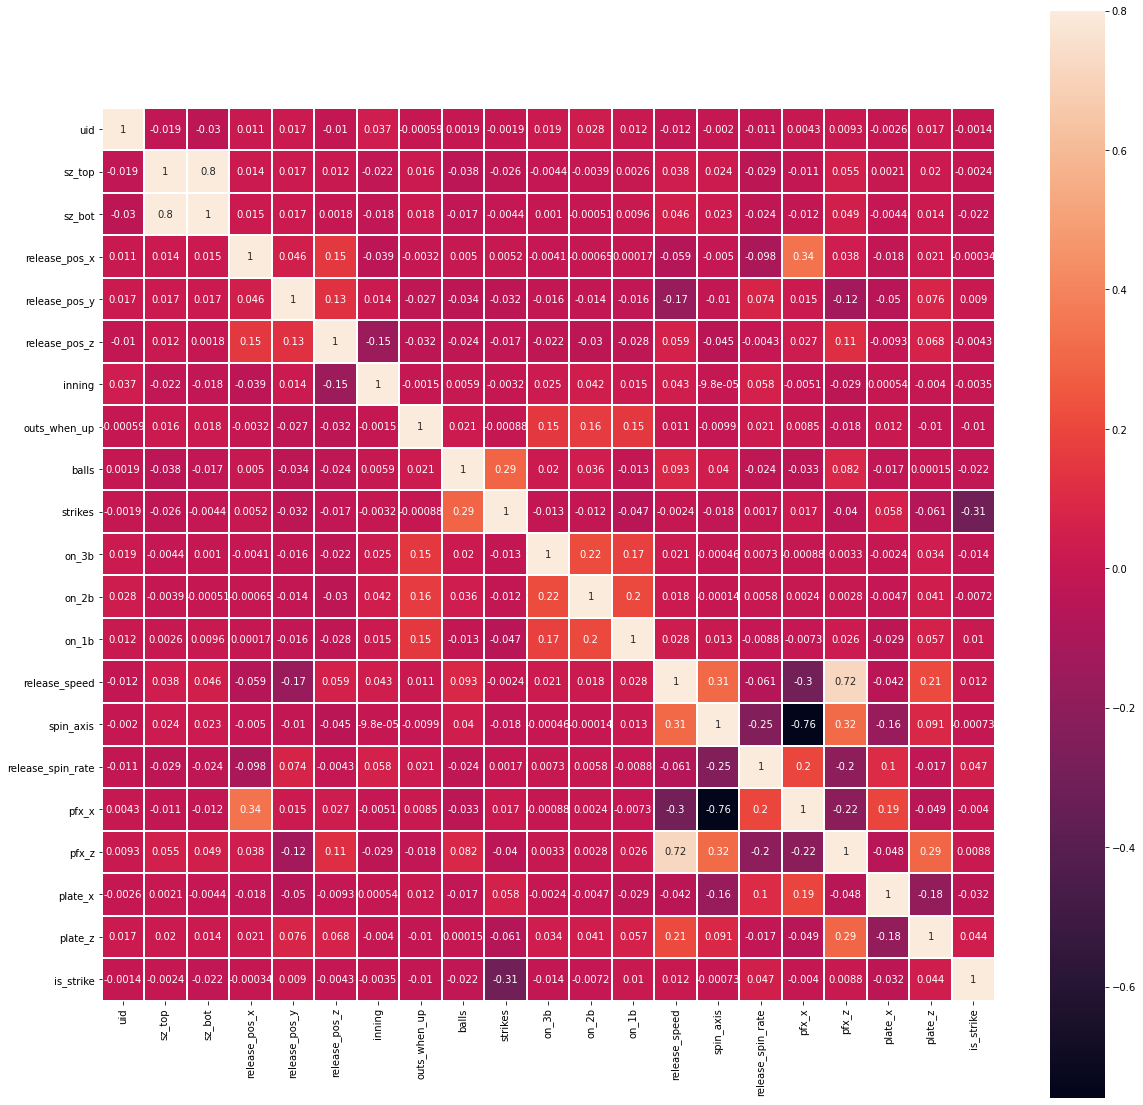

In [131]:
# y si queremos mirar todas las correlaciones?
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True)

# Modelo

In [132]:
# Save X data
X = df.drop(['is_strike','strikes'],axis='columns')
# Encode our target
y = df['is_strike']

In [133]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [134]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [135]:

# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [136]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [137]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [138]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce8fea60a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fceaf3c44f0>)])

In [139]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce8fea60a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fceaf3c44f0>)])

In [140]:
# transform train and test
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [141]:
print(np.isnan(X_train).sum().sum(), 'missing values in training data')
print(np.isnan(X_test).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train.dtype)
print('All data in X_test_processed are', X_test.dtype)
print('\n')
print('shape of data is', X_train.shape)
print('\n')
X_train

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (218453, 41)




array([[-1.62215711,  1.49865434,  1.35200523, ...,  0.        ,
         1.        ,  0.        ],
       [-0.66332791, -0.19439623,  0.01091368, ...,  0.        ,
         1.        ,  0.        ],
       [-0.0266314 , -0.44337425, -0.6596321 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.81713149,  1.44885873,  0.8490959 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.62442368,  0.15417301,  0.8490959 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.88276904,  0.1043774 ,  0.0947319 , ...,  0.        ,
         1.        ,  0.        ]])

In [142]:
# Instantiate and fit gradient boosting classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [143]:
print('Training accuracy:', xgb.score(X_train, y_train))
print('Testing accuracy:', xgb.score(X_test, y_test))

Training accuracy: 0.9460570465958352
Testing accuracy: 0.9353731220302672


In [144]:
xgb = xgb.predict(X_test)

In [145]:
print(confusion_matrix(y_test,xgb))

[[46076  2477]
 [ 2229 22036]]


#### Tenemos con este modelo:

2477 Falso Positvo

2229 Falso Negativo

In [146]:
print(classification_report(y_test,xgb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     48553
           1       0.90      0.91      0.90     24265

    accuracy                           0.94     72818
   macro avg       0.93      0.93      0.93     72818
weighted avg       0.94      0.94      0.94     72818



In [147]:
print(classification_report(y_test,xgb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     48553
           1       0.90      0.91      0.90     24265

    accuracy                           0.94     72818
   macro avg       0.93      0.93      0.93     72818
weighted avg       0.94      0.94      0.94     72818



<Figure size 432x288 with 0 Axes>

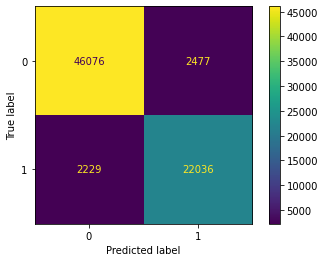

In [148]:
cm = confusion_matrix(y_test,xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure()
disp.plot()
plt.show()

# Deep Learning 

In [149]:
X_train.shape

(218453, 41)

In [150]:
# Cuantas columnas 
input_shape = X_train.shape[1]
input_shape

41

In [151]:
# Sequential model
model = Sequential()

In [152]:
model.add(Dense(41, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dropout(.2))
model.add(Dense(25, 
                activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=50)

Epoch 1/50
6827/6827 [==============================] - 18s 2ms/step - loss: 0.2550 - val_loss: 0.1599
Epoch 2/50
6827/6827 [==============================] - 16s 2ms/step - loss: 0.1815 - val_loss: 0.1565
Epoch 3/50
6827/6827 [==============================] - 15s 2ms/step - loss: 0.1734 - val_loss: 0.1561
Epoch 4/50
6827/6827 [==============================] - 16s 2ms/step - loss: 0.1699 - val_loss: 0.1537
Epoch 5/50
6827/6827 [==============================] - 15s 2ms/step - loss: 0.1687 - val_loss: 0.1562
Epoch 6/50
6827/6827 [==============================] - 16s 2ms/step - loss: 0.1665 - val_loss: 0.1543
Epoch 7/50
6827/6827 [==============================] - 17s 3ms/step - loss: 0.1657 - val_loss: 0.1564
Epoch 8/50
6827/6827 [==============================] - 19s 3ms/step - loss: 0.1647 - val_loss: 0.1535
Epoch 9/50
6827/6827 [==============================] - 23s 3ms/step - loss: 0.1643 - val_loss: 0.1536
Epoch 10/50
6827/6827 [==============================] - 17s 2ms/step - l

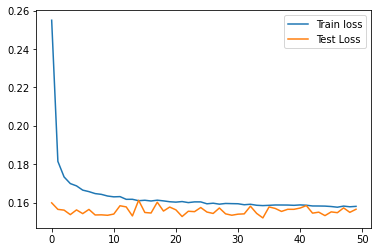

In [153]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [154]:
predictions = model.predict(X_test)
predictions = np.round(predictions)
print(classification_report(y_test,predictions))

2276/2276 [==============================] - 3s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     48553
           1       0.88      0.92      0.90     24265

    accuracy                           0.93     72818
   macro avg       0.92      0.93      0.93     72818
weighted avg       0.93      0.93      0.93     72818



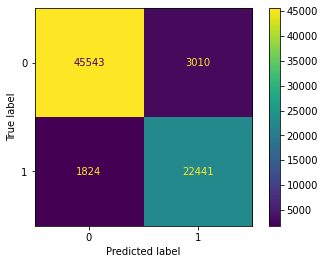

<Figure size 576x576 with 0 Axes>

In [155]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.figure(figsize=(8, 8))
plt.show()

# Valores con test

### Nuevas Predicciones

In [156]:
X = pd.read_csv("test.csv")
X .head()
#el punto es como funciona con data nueva que no ha visto

,uid,sz_top,sz_bot,pitch_type,release_pos_x,release_pos_y,release_pos_z,stand,p_throws,inning,...,on_2b,on_1b,release_speed,spin_axis,release_spin_rate,pfx_x,pfx_z,plate_x,plate_z,is_strike
0,122428,3.06,1.55,SI,-1.90,54.31,6.59,L,R,1,...,False,False,93.8,202,2333,-1.10,1.05,0.99,2.19,1
1,291855,3.29,1.56,FC,2.68,53.84,5.67,R,L,4,...,False,False,88.5,153,2068,-0.14,0.80,0.16,3.06,1
2,225539,3.62,1.69,CH,-1.17,54.73,6.94,L,R,4,...,False,False,78.5,221,1609,-0.73,0.62,-0.05,2.45,1
3,1410,3.42,1.71,FF,-1.41,54.33,5.98,R,R,6,...,False,False,94.0,220,2265,-0.69,1.33,1.30,2.24,0
4,256048,3.14,1.42,FF,3.77,53.53,3.40,R,L,7,...,False,True,90.8,100,2158,1.56,0.60,-0.18,3.76,0


In [157]:
X['is_strike'].value_counts()

0    13417
1     6583
Name: is_strike, dtype: int64

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291271 entries, 0 to 291270
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   uid                    291271 non-null  int64  
 1   sz_top                 291271 non-null  float64
 2   sz_bot                 291271 non-null  float64
 3   pitch_type             291271 non-null  object 
 4   release_pos_x          291271 non-null  float64
 5   release_pos_y          291271 non-null  float64
 6   release_pos_z          291271 non-null  float64
 7   stand                  291271 non-null  object 
 8   p_throws               291271 non-null  object 
 9   inning                 291271 non-null  int64  
 10  inning_topbot          291271 non-null  object 
 11  outs_when_up           291271 non-null  int64  
 12  balls                  291271 non-null  int64  
 13  strikes                291271 non-null  int64  
 14  if_fielding_alignment  291271 non-nu

In [159]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uid                    20000 non-null  int64  
 1   sz_top                 20000 non-null  float64
 2   sz_bot                 20000 non-null  float64
 3   pitch_type             20000 non-null  object 
 4   release_pos_x          20000 non-null  float64
 5   release_pos_y          20000 non-null  float64
 6   release_pos_z          20000 non-null  float64
 7   stand                  20000 non-null  object 
 8   p_throws               20000 non-null  object 
 9   inning                 20000 non-null  int64  
 10  inning_topbot          20000 non-null  object 
 11  outs_when_up           20000 non-null  int64  
 12  balls                  20000 non-null  int64  
 13  strikes                20000 non-null  int64  
 14  if_fielding_alignment  20000 non-null  object 
 15  of

## Escalar y hot encoding igual, todo lo que hice para esto.

In [160]:
X = X.drop(columns=['is_strike'])

In [161]:
X.head()

,uid,sz_top,sz_bot,pitch_type,release_pos_x,release_pos_y,release_pos_z,stand,p_throws,inning,...,on_3b,on_2b,on_1b,release_speed,spin_axis,release_spin_rate,pfx_x,pfx_z,plate_x,plate_z
0,122428,3.06,1.55,SI,-1.90,54.31,6.59,L,R,1,...,False,False,False,93.8,202,2333,-1.10,1.05,0.99,2.19
1,291855,3.29,1.56,FC,2.68,53.84,5.67,R,L,4,...,False,False,False,88.5,153,2068,-0.14,0.80,0.16,3.06
2,225539,3.62,1.69,CH,-1.17,54.73,6.94,L,R,4,...,False,False,False,78.5,221,1609,-0.73,0.62,-0.05,2.45
3,1410,3.42,1.71,FF,-1.41,54.33,5.98,R,R,6,...,False,False,False,94.0,220,2265,-0.69,1.33,1.30,2.24
4,256048,3.14,1.42,FF,3.77,53.53,3.40,R,L,7,...,False,False,True,90.8,100,2158,1.56,0.60,-0.18,3.76


In [162]:
print(X.isna().sum().sum(), 'missing values')

0 missing values


In [163]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [164]:

# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [165]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [166]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [167]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce8071ed30>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce8071ebb0>)])

In [168]:
# fit on train
preprocessor.fit(X)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce8071ed30>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce8071ebb0>)])

In [169]:
# transform train and test
X_ = preprocessor.transform(X)

In [170]:
X_

array([[-0.36793302, -1.59369418, -0.40408626, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.51288266, -0.43956693, -0.31932329, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.77670618,  1.21635478,  0.7825953 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.31250515,  1.26653423,  0.95212124, ...,  0.        ,
         1.        ,  0.        ],
       [-1.17628845, -0.38938748,  0.27401749, ...,  0.        ,
         1.        ,  0.        ],
       [-1.65778491,  1.46725201,  1.0368842 , ...,  0.        ,
         1.        ,  0.        ]])

In [171]:
print(np.isnan(X_).sum().sum(),'missing values in training data')
print('\n')
print('All data in X_test_processed are', X_.dtype)
print('\n')
print('shape of data is', X_.shape)
print('\n')
X_

0 missing values in training data


All data in X_test_processed are float64


shape of data is (20000, 41)




array([[-0.36793302, -1.59369418, -0.40408626, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.51288266, -0.43956693, -0.31932329, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.77670618,  1.21635478,  0.7825953 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.31250515,  1.26653423,  0.95212124, ...,  0.        ,
         1.        ,  0.        ],
       [-1.17628845, -0.38938748,  0.27401749, ...,  0.        ,
         1.        ,  0.        ],
       [-1.65778491,  1.46725201,  1.0368842 , ...,  0.        ,
         1.        ,  0.        ]])

In [181]:
preds = model.predict(X_)
preds = preds.round(4)
preds

625/625 [==============================] - 1s 2ms/step


array([[0.3249],
       [1.    ],
       [0.9951],
       ...,
       [0.    ],
       [0.3271],
       [0.    ]], dtype=float32)

In [173]:
 X['uid']

0        122428
1        291855
2        225539
3          1410
4        256048
          ...  
19995     62773
19996      3763
19997    183723
19998     49610
19999      6236
Name: uid, Length: 20000, dtype: int64

In [182]:
print(preds)

[[0.3249]
 [1.    ]
 [0.9951]
 ...
 [0.    ]
 [0.3271]
 [0.    ]]


In [183]:
preds2 = preds[:,0]

In [184]:
X['uid'].shape

(20000,)

## Evaluamos el modelo con los datos de prueba con los datos desconocidos

In [185]:
results = pd.DataFrame({'uid': X['uid'],"is_strike":preds2})

In [186]:
results.head(35)

,uid,is_strike
0,122428,0.3249
1,291855,1.0000
2,225539,0.9951
3,1410,0.0008
4,256048,1.0000
5,192282,0.0000
6,157268,0.0175
7,56958,0.0000
8,211402,0.8236
9,84564,0.0000


In [187]:
results['is_strike'].value_counts()

0.0000    5998
0.9951    1156
0.0001     621
1.0000     597
0.0002     319
          ... 
0.9223       1
0.6898       1
0.6502       1
0.9121       1
0.3131       1
Name: is_strike, Length: 5036, dtype: int64

In [188]:
results.to_csv('Predictions.csv',index = False)

# El modelo de Kaggle

Las predicciones dan super bien con xgboost le va mejor que redes neuronales, el modelo se equivoca 63 en no strikes.

Y 63 que son strikes.

Con Deep Learning fue:


Del Test 
0:    13417
1:     6583

Predijo 
0:    13999
1:     6001
